1. How do you deal with a forecasting problem?
*MA as baseline model

Any data recorded with some fixed interval of time is called as time series data.
In time series data, time will always be independent variable and there can be one or many dependent variable.

### White noise vs Random walk
https://varshasaini.in/questions/what-is-the-difference-between-white-noise-and-random-walk/

## Time Series Decomposition

Time series data can be modeled as an addition or product of trend (Tt), Seasonality (St), cyclical (Ct), or Irregular components (It).

<b>Additive models</b> assume that seasonality and cyclical component are independent of the trend. These are not very common since, in many cases, the seasonality component may not be independent of the trend. The additive model can be used for time series data where linear trends are formed wherein changes are constant over time. Let’s assume we are dealing with the additive model, that is, consisting of a linear trend and seasonal cycle with the same frequency (width) and amplitude (height).

<b>Multiplicative Models</b> are commonly used models for many datasets across industries. For building a forecasting model,
only trend and seasonal components are considered. For cyclical components, a large dataset must have a span of more than 10 years; hence, due to the limitation of availing such a large dataset, cyclical components are rarely used for modeling. The multiplicative models ideally perform well for the nonlinear types of modeling (quadric or exponential).

https://www.youtube.com/watch?v=26h6kCtYo1U

## Why times series has to be stationary?

Q)What does it mean when we say time series is stationary?<br>
In other words statistical properties of the time series data should not be a function of time.

Like for stationarity we know we need constant mean, std & autocorrelation but for non-stationarity, we don’t know anything!! Non-stationarity, as discussed for independent data, can take any form. No fixed norms are present which can model non-stationary data like there exists ARIMA, AR, MA, or any other model for stationary data.
The mean can be double, or triple the previous observations can be 0. The same goes for std & autocorrelation, hence it cannot be modeled & that’s why we convert non-stationary data to stationary first so that we know something about the features of this time series & hence can & apply our different models

In my humble opinion, the main reason why stationarity is important in a time series is that tools used in time series analysis and forecasting assume stationarity.
It's also important because it helps us identify the driving factors: when we detect a change in a time series and a change in some other time series, we may be able to infer a correlation. But we need both time series to be stationary (no trend and no seasonality), otherwise the correlation we find will be misleading.

Q) What is auto-correlation?<br>
Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

Q) Test for Stationarity<br>
1. KPSS?
2. Rolling Statistics : In rolling statistics technique we define a size of window to calculate the mean and standard deviation throughout the series. For stationary series mean and standard deviation shouldn't change with time.
3. ADF : The ADF test is a fundamentally a statistical significance test. That means , There is a hypothesis testing involved with a null and alternate hypothesis and as a result a test statistic is computed and p-values get reported. From the statistic test and the p-values , we can make an inference as to whether a given time series is stationary or not.<br>
ADF test will return 'p-value' and 'Test Statistics' output values.<br>
p-value > 0.05: non-stationary.<br>
p-value <= 0.05: stationary.<br>
Test statistics: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series<br>
https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0

Q)More detailed analysis of how it works. And what do the test statistics and critical values indicate?

##Components of Time Series and ARIMA forecasting Model

1. Trend : Trend represent the change in dependent variables with respect to time from start to end. In case of increasing trend dependent variable will increase with time and vice versa. It's not necessary to have definite trend in time series, we can have a single time series with increasing and decreasing trend. In short trend represent the varying mean of time series data.<br>
Detecting Trend Using a Hodrick-Prescott Filter?
2. Detrending - 1st order differencing (Still, following the second or third order of differencing may be required to meet the objective if the first order differencing fails) + SciPy Signals (remove linear trends) + HP Filters? (1.Works best only when data has white noise or follows a normal distribution 2. Gives correct results for the analysis of static or historical data. Misleads prediction for dynamically varying data. 3.Non-linear technique that works well to remove short-term fluctuation as well and is used for tuning parameters to control the degree of smoothing)
3. Seasonality : If observations repeats after fixed time interval then they are referred as seasonal observations. These seasonal changes in data can occur because of natural events or man-made events. For example every year warm cloths sales increases just before winter season. So seasonality represent the data variations at fixed intervals.<br>
Detecting Seasonality using Multiple Box Plots + Auto Correlation Plot? + Sequence or seasonal subseries plots
4. Deseasoning -  python’s stats-model library called seasonal decomposition to remove seasonality from data
5.Cyclicity : Cyclicity occurs when observations in the series repeats in random pattern. Note that if there is any fixed pattern then it becomes seasonality, in case of cyclicity observations may repeat after a week, months or may be after a year. These kinds of patterns are much harder to predict.<br>
Detecting Cyclical Variation using HP filters
6. Irregularities : This is also called as noise. Strange dips and jump in the data are called as irregularities. These fluctuations are caused by uncontrollable events like earthquakes, wars, flood, pandemic etc. For example because of COVID-19 pandemic there is huge demand for hand sanitizers and masks.


### Decomposition using seasonal_decompose

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Time_Series_AirPassengers.csv')
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (144, 2)
Column datatypes= 
 Month         object
Passengers     int64
dtype: object


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


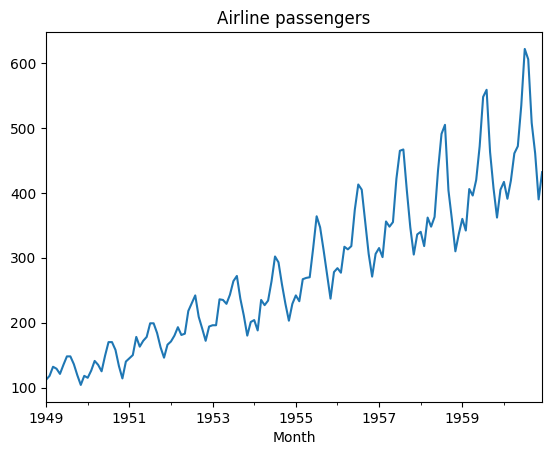

In [ ]:
df.set_index('Month',inplace=True)
df.index = pd.to_datetime(df.index)
y = df["Passengers"]
y.name = "n_passengers"

y.plot(title="Airline passengers");

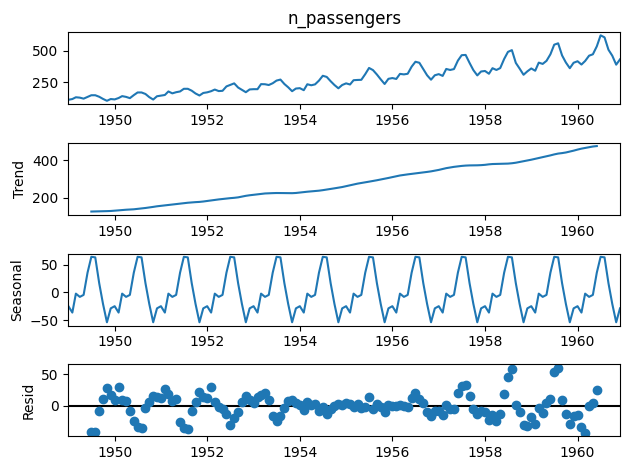

In [ ]:
# Ideally it should be multiplicative especially when looking at the increasing strength of the seasonal component over time
seasonal_decomp = seasonal_decompose(y, model="additive")
seasonal_decomp.plot();

'''
In the plot we can see another hint that the additive model is not the right choice here —there are clear patterns in the residuals over time.
In case of a good fit, we would expect the residuals to behave randomly without any pattern.
'''

#### Manual decomposition

<b>Let’s assume we are dealing with the additive model, that is, consisting of a linear trend and seasonal cycle with the same frequency (width) and amplitude (height). For the multiplicative model, you just need to replace the additions with multiplications and subtractions with divisions.

On a side note, in the additive decomposition the detrended series is centered at zero, as adding zero makes no change to the trend. The same logic is applied in the multiplicative approach, with the difference that it is centered around one. That is because multiplying the trend by one also has no effect on it.</b>

Trend : Trend is calculated using a centered moving average of the time series. The moving average is calculated using a window length corresponding to the frequency of the time series. For example, we would use a window of length 12 for monthly data.
Smoothing the series using such a moving average comes together with some disadvantages. First, we are “losing” the first and last few observations of the series. Second, the MA tends to over-smooth the series, which makes it less reactive to sudden changes in the trend or jumps

We have used a rolling window of length 13 (12 months + 1 to make it an odd number for the centered average).

Q) What is CMA?
In a centered moving average, the value of the moving average at time t is computed by centering the window around time t and averaging across the w values within the window.

Seasonality : To calculate the seasonal component, we first need to detrend the time series. We do it by subtracting the trend component from the original time series (remember, we divide for the multiplicative variant).

Having done that, we calculate the average values of the detrended series for each seasonal period. In the case of months, we would calculate the average detrended value for each month.

The seasonal component is simply built from the seasonal averages repeated for the length of the entire series Again, this is one of the arguments against using the simple seasonal decomposition — the seasonal component is not allowed to change over time, which can be a very strict and often unrealistic assumption for longer time series.

https://towardsdatascience.com/time-series-diy-seasonal-decomposition-f0b469afed44

In [ ]:

# create the DF
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["n_passengers"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["n_passengers"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,n_passengers,trend,detrended,month,seasonality,resid
Month,,,,,,
1949-01-01,112,NaN,NaN,1,-30.825175,NaN
1949-02-01,118,NaN,NaN,2,-42.027972,NaN
1949-03-01,132,NaN,NaN,3,-4.139860,NaN
1949-04-01,129,NaN,NaN,4,-6.944056,NaN
1949-05-01,121,NaN,NaN,5,-0.699301,NaN
1949-06-01,135,NaN,NaN,6,37.146853,NaN
1949-07-01,148,125.769231,22.230769,7,64.923077,-42.692308
1949-08-01,148,126.846154,21.153846,8,64.580420,-43.426573
1949-09-01,136,128.615385,7.384615,9,15.636364,-8.251748


### Statistical Model Building

#### Trend : Visualize

Text(0.5, 1.0, 'Trend of the Time Series')

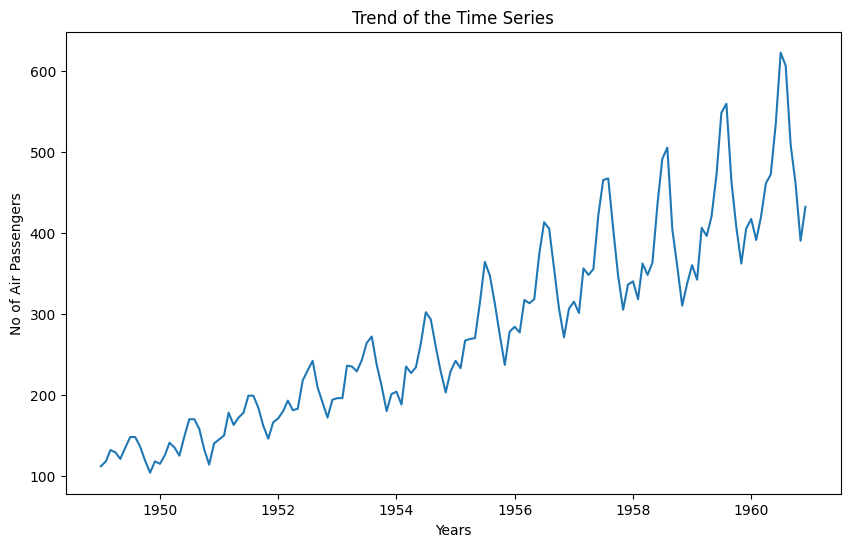

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

#### Seasonality : Visualize

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='Passengers'>

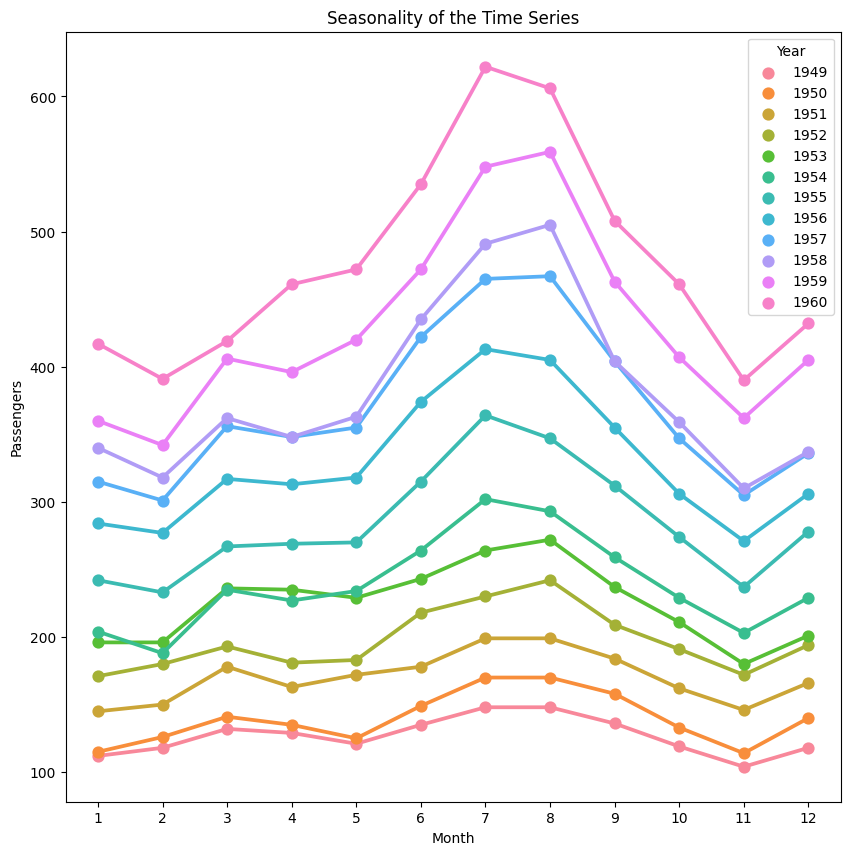

In [ ]:
import seaborn as sns

# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

#### Visualize trend and seasonality using seasonal_decompose

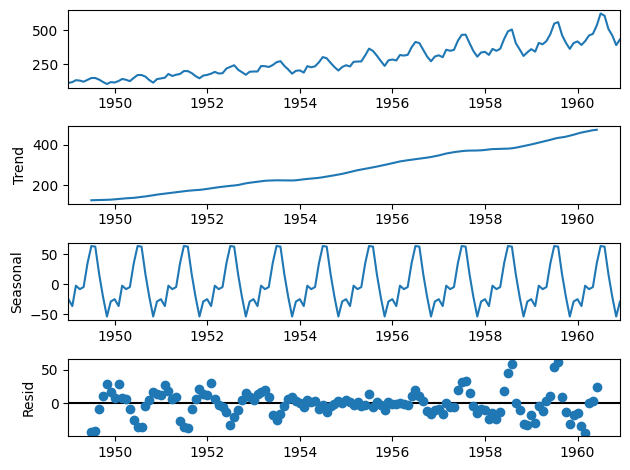

In [ ]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()

#### Staionary check with rolling statistics and ADF test
Rolling statistics: Standard deviation has very less variation but mean is increasing continuously.<br>
Duckey Fuller Test: Test statistic is way more than the critical values.

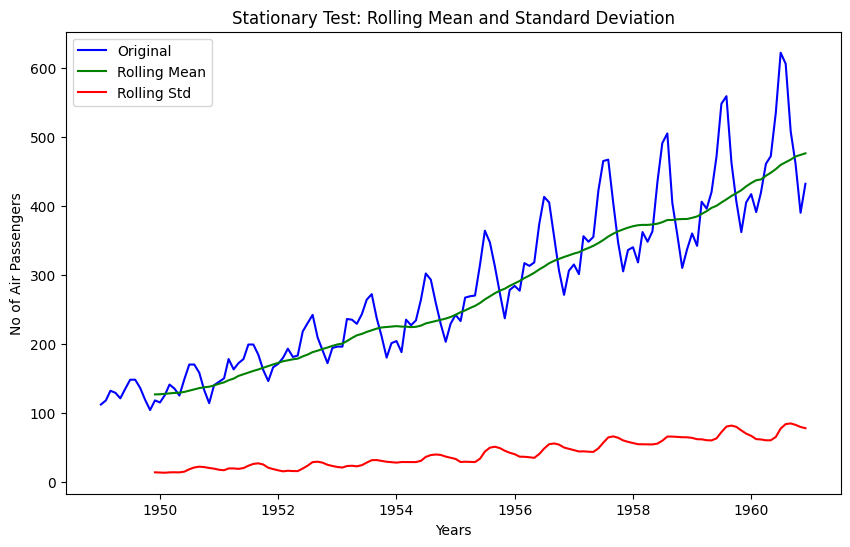

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller,acf, pacf

def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()

    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')
    plt.legend()
    plt.show()

    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

stationarity_test(df)

#### Trend removal : Differencing and checking ST
So from above graph its clear that differencing technique removed the trend from the time series, but variance is still there Now lets run the stationarity_test() to check the effectiveness of the 'Differencing' technique


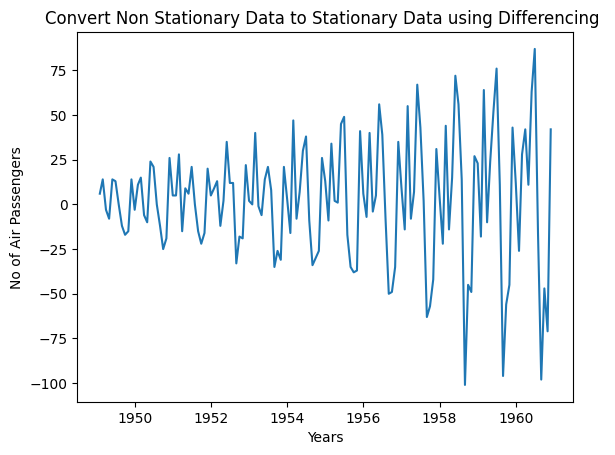

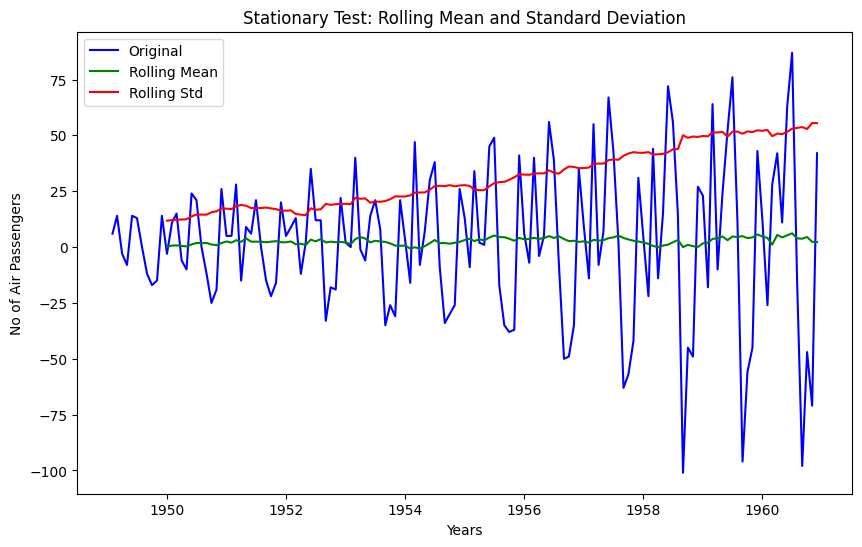

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

####Variance removal : Transformation and ST

A simple but often effective way to stabilize the variance across time is to apply a power transformation to the time series. Log, square root, cube root are most commonly used transformation techniques. Most of the time you can pick the type of growth of the time series and accordingly choose the transformation method. For. e.g. A time series that has a quadratic growth trend can be made linear by taking the square root. In case differencing don't work, you may first want to use one of above transformation technique to remove the variation from the series.

Since variance is proportional to the levels, we are going to use the log transformation.

Since log transformation has removed the variance from series, lets use this transformed data hence forward. Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back.

So, first this transformation is done, and then detrendind happens

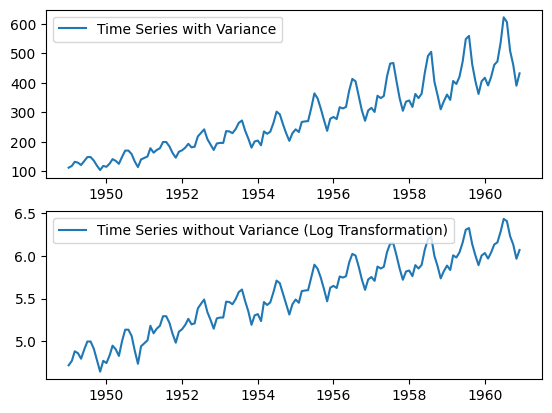

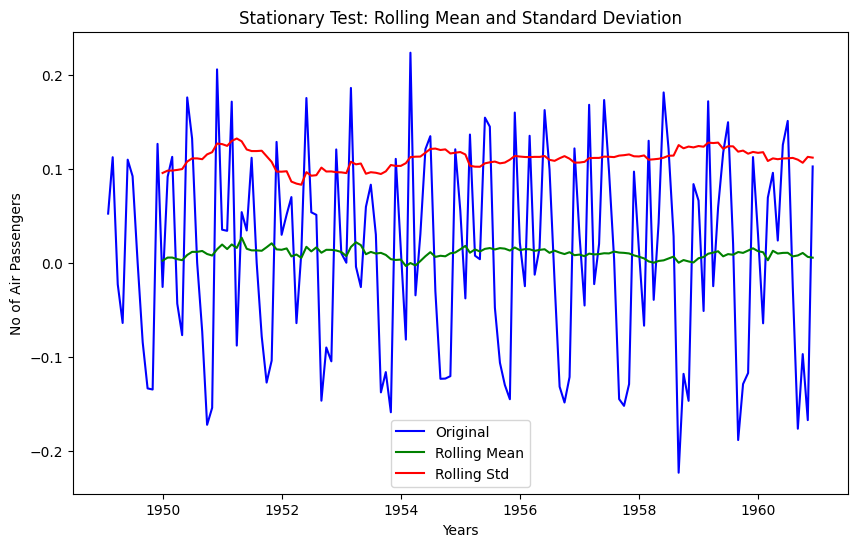

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()
plt.show()

df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

#### Trend removal : MA, you can go with WMA as well and ST
*On variance removed data

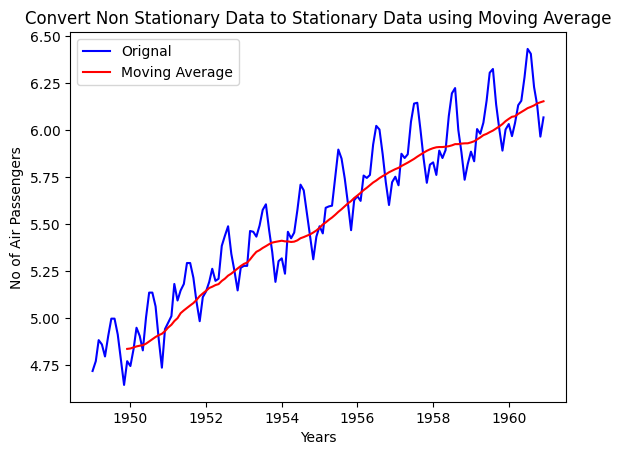

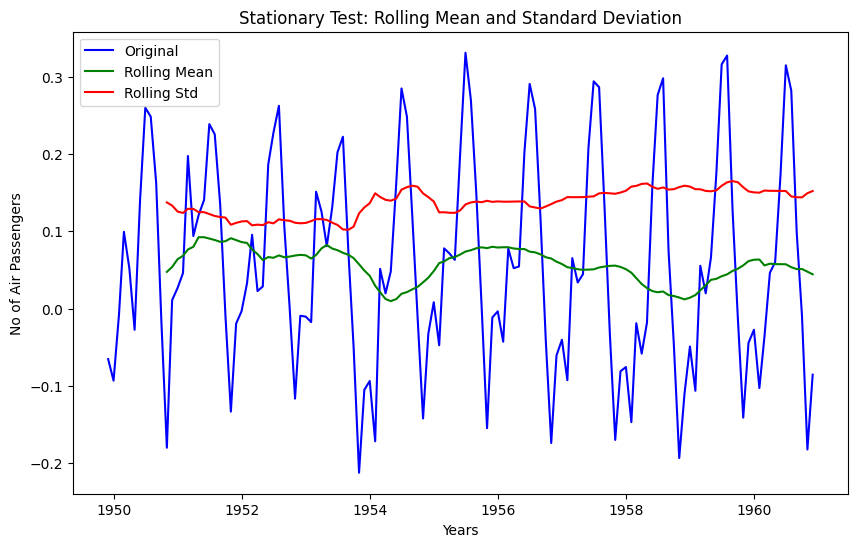

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

#### Trend and Seasonality removal with seasonal_decompose and ST
*on variance-removed data



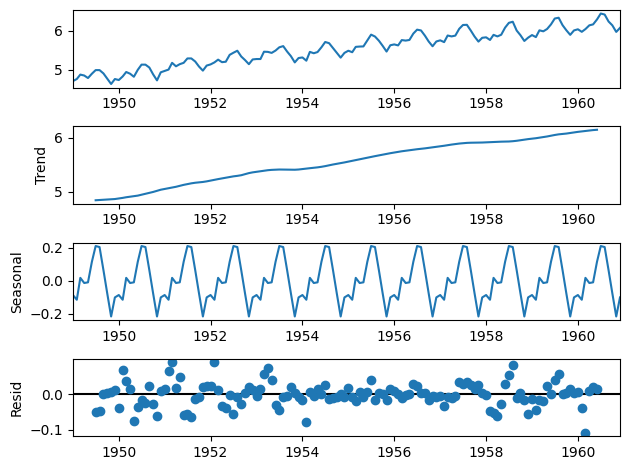

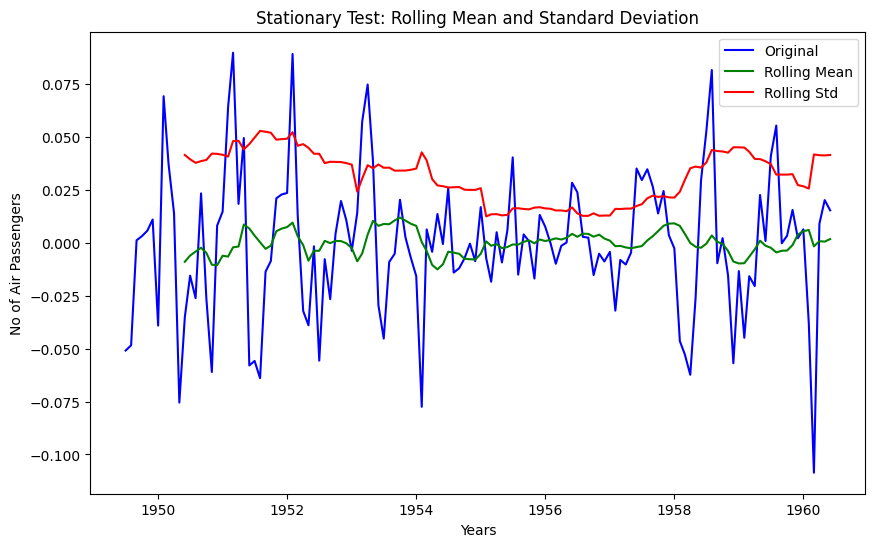

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
decomposition = sm.tsa.seasonal_decompose(df_log,period =12)
fig = decomposition.plot()

df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

#### ACF and PACF
*In this article, we focus on the OLS? approach, which is based on autoregressive (AR)? models.

https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

Blue bars on an ACF plot above are the error bands, and anything within these bars is not statistically significant. It means that correlation values outside of this area are very likely a correlation and not a statistical fluke. The confidence interval is set to 95% by default.

Notice that for a lag zero, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.

PACF - The idea behind this approach is that the variance explained by intermediate time points can be excluded from the lag k-th’s coefficient.

*On stationary data, in this case df_log_diff
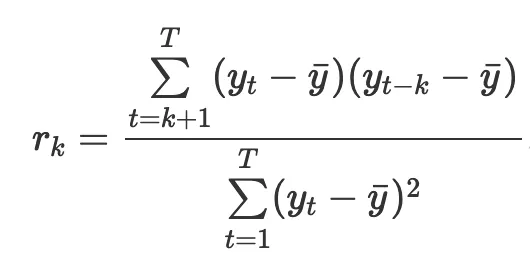

#### List of statistical methods
Models Used For Time Series Forecasting
Autoregression (AR)<br>
Moving Average (MA)<br>
Autoregressive Moving Average (ARMA)<br>
Autoregressive Integrated Moving Average (ARIMA)<br>
Seasonal Autoregressive Integrated Moving-Average (SARIMA)<br>
Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)<br>
Vector Autoregression (VAR)<br>
Vector Autoregression Moving-Average (VARMA)<br>
Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)<br>
Simple Exponential Smoothing (SES)<br>
Holt Winter’s Exponential Smoothing (HWES)<br>

#### ARIMA forecasting

https://towardsdatascience.com/arima-simplified-b63315f27cbc

https://www.kaggle.com/code/satishgunjal/tutorial-time-series-analysis-and-forecasting

## Time Series Forecasting Methods

Time series forecasting can broadly be categorized into the following categories:

Classical / Statistical Models — Moving Averages, Exponential Smoothing, ARIMA, SARIMA, TBATS<br>
Machine Learning — Linear Regression, XGBoost, Random Forest, or any ML model with reduction methods<br>
Deep Learning — RNN, LSTM

## Statistical Models

1. https://www.kaggle.com/code/satishgunjal/tutorial-time-series-analysis-and-forecasting
2. https://www.datacamp.com/tutorial/tutorial-time-series-forecasting - Mix of statistical + ML + Frameworks
3. https://www.kaggle.com/learn/time-series
4. https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/
5. https://builtin.com/data-science/time-series-forecasting-python
6. https://medium.com/geekculture/time-series-forecast-in-python-5c4c61e1c2c2

## Machine Learning for Retail Demand Forecasting
*Approach the forecasting time period<br>
* Examples of temporal features : Day, Month, Year, Day of the week, Daily and Monthly averages, Rolling mean(shift/lag)

1. https://towardsdatascience.com/machine-learning-for-store-demand-forecasting-and-inventory-optimization-part-1-xgboost-vs-9952d8303b48 - XGBoost vs Rolling Mean

2. https://www.samirsaci.com/machine-learning-for-retail-sales-forecasting-features-engineering/ - Continuation of above

3. https://github.com/Semantive/Kaggle-Demand-Forecasting-Models/tree/master - Mix of ML and statistical models

4. https://arnav-andraskar.medium.com/predict-future-sales-using-machine-learning-9f4dc89f7e3b

5. https://www.analyticsvidhya.com/blog/2021/06/predict-future-sales-using-xgbregressor/#h2_1

6. https://www.geeksforgeeks.org/inventory-demand-forecasting-using-machine-learning-python/ - Cyclic features

7. https://towardsdatascience.com/time-series-forecasting-with-machine-learning-b3072a5b44ba

8. https://medium.com/geekculture/time-series-forecast-using-deep-learning-adef5753ec85

### XGBoost(using temporal features) vs Rollin mean for forecasting

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Import training and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# DATES FEATURES
def date_features(df):
    # Date Features
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['day'] = df.date.dt.day
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofweek'] = df.date.dt.dayofweek
    df['weekofyear'] = df.date.dt.weekofyear

    # Additionnal Data Features
    ''' First of all, we add +1 to log(1) will be 0. ** is exponent. If you look at the graph, the value exponentially
    increases at the beginning of the year. And, also there is a upward shift every year. Porbably indicating sales behaviour?
    '''
    df['day^year'] = np.log((np.log(df['dayofyear'] + 1)) ** (df['year'] - 2000))

    # Drop date
    df.drop('date', axis=1, inplace=True)

    return df

# Dates Features for Train, Test
train, test = date_features(train), date_features(test)

<ipython-input-116-eac54db59593>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date.dt.weekofyear
<ipython-input-116-eac54db59593>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date.dt.weekofyear


<Axes: >

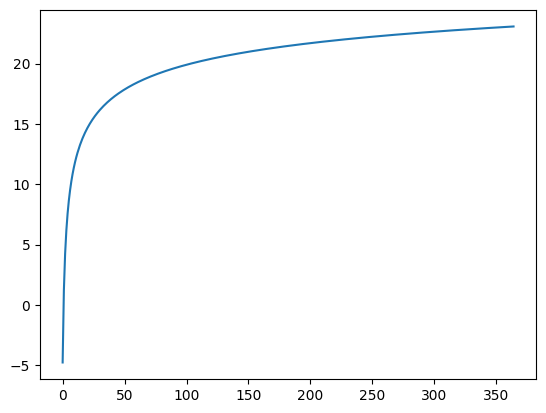

In [ ]:
train['day^year'].iloc[:365].plot()

<Axes: >

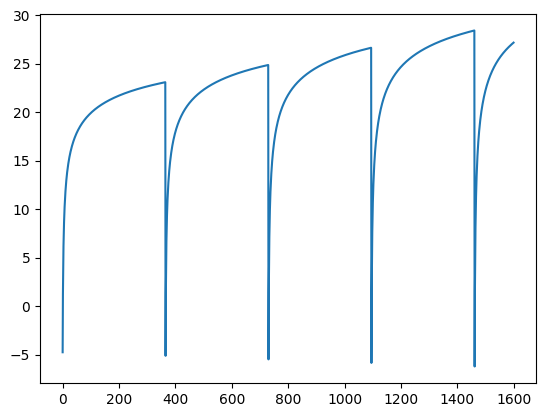

In [ ]:
train['day^year'].iloc[:1600].plot()

In [ ]:
# Daily Average, Monthly Average for train
train['daily_avg']  = train.groupby(['item','store','dayofweek'])['sales'].transform('mean')
train['monthly_avg'] = train.groupby(['item','store','month'])['sales'].transform('mean')
train = train.dropna()

# Average sales for Day_of_week = d per Item,Store
daily_avg = train.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()
# Average sales for Month = m per Item,Store
monthly_avg = train.groupby(['item','store','month'])['sales'].mean().reset_index()

In [ ]:
monthly_avg

,item,store,month,sales
0,1,1,1,13.709677
1,1,1,2,14.631206
2,1,1,3,17.600000
3,1,1,4,20.786667
4,1,1,5,22.245161
...,...,...,...,...
5995,50,10,8,84.567742
5996,50,10,9,78.873333
5997,50,10,10,73.045161
5998,50,10,11,76.993333


In [ ]:
# Merge Test with Daily Avg, Monthly Avg
def merge(df1, df2, col,col_name):

    df1 =pd.merge(df1, df2, how='left', on=None, left_on=col, right_on=col,
            left_index=False, right_index=False, sort=True,
             copy=True, indicator=False)

    df1 = df1.rename(columns={'sales':col_name})
    return df1

# Add Daily_avg and Monthly_avg features to test
test = merge(test, daily_avg,['item','store','dayofweek'],'daily_avg')
test = merge(test, monthly_avg,['item','store','month'],'monthly_avg')

# Sales Rolling mean sequence per item; rolling sequnce of the last 10 points
rolling_10 = train.groupby(['item'])['sales'].rolling(10).mean().reset_index().drop('level_1', axis=1)
train['rolling_mean'] = rolling_10['sales']

# 90 last days of training rolling mean sequence added to test data; select only the last 90 points per category and add to test, which is for 3 months of data
# which basically means that say test has april-may-june. we took jan-feb-march. So, jan1 roolling mean coincides with april1
rolling_last90 = train.groupby(['item','store'])['rolling_mean'].tail(90).copy()
test['rolling_mean'] = rolling_last90.reset_index().drop('index', axis=1)

# Shifting rolling mean 3 months; to have the same shift as test, we need to shift the data here as well
train['rolling_mean'] = train.groupby(['item'])['rolling_mean'].shift(90) # Create a feature with rolling mean of day - 90
train.head()

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg,rolling_mean
0,1,1,13,2013,1,1,1,1,1,-4.764668,18.168582,13.709677,NaN
1,1,1,11,2013,1,2,2,2,1,1.222622,18.793103,13.709677,NaN
2,1,1,14,2013,1,3,3,3,1,4.246245,19.452107,13.709677,NaN
3,1,1,13,2013,1,4,4,4,1,6.186505,21.015326,13.709677,NaN
4,1,1,10,2013,1,5,5,5,1,7.581575,22.973180,13.709677,NaN


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Clean features highly correlated to each others
for df in [train, test]:
    df.drop(['dayofyear',
                  'weekofyear',
                  'daily_avg',
                  'day',
                  'month',
                  'item',
                  'store',],
                 axis=1,
                 inplace=True)

# Features Scaling (except sales)
sales_series, id_series = train['sales'], test['id']
# Features Scaling
train = (train - train.mean()) / train.std()
test = (test - test.mean()) / test.std()
# Retrieve actual Sales values and ID
train['sales'] = sales_series
test['id'] = id_series

# Training Data
X_train = train.drop('sales', axis=1).dropna()
y_train = train['sales']
# Test Data
test.sort_values(by=['id'], inplace=True)
X_test = test.drop('id', axis=1)
#df = train
df_train = train.copy()

# Train Test Split
X_train , X_test ,y_train, y_test = train_test_split(df_train.drop('sales',axis=1),df_train.pop('sales'), random_state=123, test_size=0.2)

# XGB Model
matrix_train = xgb.DMatrix(X_train, label = y_train)
matrix_test = xgb.DMatrix(X_test, label = y_test)

# Run XGB
model = xgb.train(params={'objective':'reg:linear','eval_metric':'mae'}
                ,dtrain = matrix_train, num_boost_round = 500,
                early_stopping_rounds = 20, evals = [(matrix_test,'test')],)

[16:15:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-mae:36.30713
[1]	test-mae:25.43997
[2]	test-mae:17.90136
[3]	test-mae:12.81951
[4]	test-mae:9.59524
[5]	test-mae:7.70793
[6]	test-mae:6.67479
[7]	test-mae:6.13492
[8]	test-mae:5.86055
[9]	test-mae:5.72302
[10]	test-mae:5.65531
[11]	test-mae:5.62178
[12]	test-mae:5.60495
[13]	test-mae:5.59644
[14]	test-mae:5.59180
[15]	test-mae:5.58908
[16]	test-mae:5.58761
[17]	test-mae:5.58638
[18]	test-mae:5.58593
[19]	test-mae:5.58466
[20]	test-mae:5.58423
[21]	test-mae:5.58423
[22]	test-mae:5.58424
[23]	test-mae:5.58364
[24]	test-mae:5.58355
[25]	test-mae:5.58351
[26]	test-mae:5.58318
[27]	test-mae:5.58319
[28]	test-mae:5.58321
[29]	test-mae:5.58341
[30]	test-mae:5.58300
[31]	test-mae:5.58311
[32]	test-mae:5.58322
[33]	test-mae:5.58340
[34]	test-mae:5.58267
[35]	test-mae:5.58254
[36]	test-mae:5.58252
[37]	test-mae:5.58200
[38]	test-mae:5.58197
[39]	test-mae:5.58201
[40]	te

Forecasting results of XGBoost and Rolling mean are compared : https://towardsdatascience.com/machine-learning-for-store-demand-forecasting-and-inventory-optimization-part-1-xgboost-vs-9952d8303b48

### Temporal based Features

Libraries : tsfresh<br>
https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0<br>
In the following we try to explore smooth, non-monotonic encoding that locally preserves the relative ordering of time features. - https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html


1.For example, e-commerce cosmetics sales are driven by special events (promotions) and on how you advertise a reference on the website (first page, second page, …).

**Bucket 1 : Transactional data**<br>
**Bucket 2: Sales Lags and Average**<br>
**Bucket 3: Rolling Mean and Rolling Mean applied on lag**<br>
**Bucket 4: Sales Trend and Rolling Maximum**<br>
**Bucket 5: Stock-Out and Store Closed**<br>
**Bucket 6: Price Relative with the same item in other stores or other items in the sub-category**<br>






#### Cylic features

In [ ]:
train['month']

0          1
1          1
2          1
3          1
4          1
          ..
912995    12
912996    12
912997    12
912998    12
912999    12
Name: month, Length: 913000, dtype: int64

In [ ]:
train['m1'] = np.sin(train['month'] * (2 * np.pi / 12))
train['m2'] = np.cos(train['month'] * (2 * np.pi / 12))
train.head()

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year,m1,m2
0,1,1,13,2013,1,1,1,1,1,-4.764668,0.5,0.866025
1,1,1,11,2013,1,2,2,2,1,1.222622,0.5,0.866025
2,1,1,14,2013,1,3,3,3,1,4.246245,0.5,0.866025
3,1,1,13,2013,1,4,4,4,1,6.186505,0.5,0.866025
4,1,1,10,2013,1,5,5,5,1,7.581575,0.5,0.866025


<Axes: >

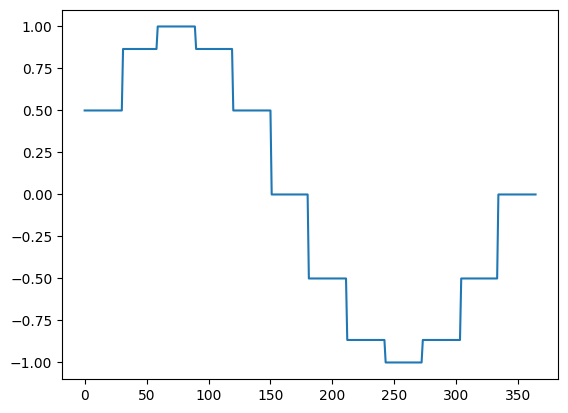

In [ ]:
train['m1'].iloc[:365].plot()

## Advanced Machine Learning

1. https://huggingface.co/blog/time-series-transformers
2. https://towardsdatascience.com/how-to-make-a-pytorch-transformer-for-time-series-forecasting-69e073d4061e
3. https://towardsdatascience.com/temporal-fusion-transformer-time-series-forecasting-with-deep-learning-complete-tutorial-d32c1e51cd91

1. Transformers explanation : Check in BERT Based NER
2. Temporal fusion Transformers : Keywords : VSN(GRN) + LSTM + Interpretable Multi-Head Attention + Quantile Regression + Explainability(VSN for feature importance and Multi-Head Attention for seasonality?)

Quantile regression? OLS?

Idealy, **percentiles are just quantiles** which divide the data into 100 equally sized groups

Quantile qₐ is a value that divides a given set of numbers in a way at which α * 100% of numbers are less than the value and (1 — α) * 100% of numbers are greater than the value.

Quantiles qₐ for α = 0.25, α = 0.5 and α = 0.75 are often utilized in statistics and called quartiles. These quartiles are denoted as Q₁, Q₂ and Q₃ respectively. Three quartiles split data into 4 equal parts.

Similarly, there are percentiles p which divide a given set of numbers by 100 equal parts. A percentile is denoted as pₐ where α is the percentage of numbers less than the corresponding value.

Quartiles Q₁, Q₂ and Q₃ correspond to percentiles p₂₅, p₅₀ and p₇₅ respectively.




Quantile regression is a type of regression analysis used in statistics and econometrics. Whereas the method of least squares estimates the conditional mean of the response variable across values of the predictor variables, quantile regression estimates the conditional median (or other quantiles) of the response variable. Quantile regression is an extension of linear regression used when the conditions of linear regression are not met.

To understand better the logic behind it, let us suppose we objective is to predict the 80-th quantile, thus the value of α = 0.8 is plugged into the equations. Basically, in such a case, the quantile loss penalizes under-estimated predictions 4 times more than over-estimated. This way the model will be more critical to under-estimated errors and will predict higher values more often. As a result, the fitted model on average will over-estimate results approximately in 80% of cases and in 20% it will produce under-estimated.

https://towardsdatascience.com/quantile-loss-and-quantile-regression-b0689c13f54d

## Frameworks

1. pytorch-forecast - https://pytorch-forecasting.readthedocs.io/en/stable/tutorials/stallion.html, https://www.kaggle.com/code/tomwarrens/temporal-fusion-transformer-in-pytorch
2. prophet - https://medium.com/codex/introduction-to-prophet-algorithm-a59e463a6c72<br>
https://blog.exploratory.io/an-introduction-to-time-series-forecasting-with-prophet-package-in-exploratory-129ed0c12112<br>
https://www.phdata.io/blog/facebook-prophet-tutorial-time-series-forecasting/

Prophet is an open source library published by Facebook that is based on decomposable (trend+seasonility+holidays) models.It is based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

The equation for Prophet is below:

y(t)=g(t)+s(t)+h(t)+εt

Where:

g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series

s(t): periodic changes (e.g. weekly/yearly seasonality

h(t): effects of holidays (user provided) with irregular schedules

εt: error term accounts for any unusual changes not accommodated by the model

## Time Series forecasting in IoT

1. https://towardsdatascience.com/time-series-analysis-for-predictive-maintenance-of-turbofan-engines-1b3864991da4
2. https://www.kaggle.com/code/jegun19/predictive-maintenance-time-series-forecasting
3. https://kmutya.github.io/predmaintenance/<br>
Therefore, we will use the auto.arima() function from the forecast package in R. This function returns the best ARIMA model according to either AIC, AICc or BIC value by conducting a search over possible model.

A multilayer perceptron is a basic feed forward ANN network. In this post we implement MLP using the nnfor package in R. Neural networks are not great in modelling trends as in time series with trends the values are ever increasing/decreasing but the activation functions used within the network are bounded to
[
0
,
1
]
 or
[
−
1
,
1
]
 depending on the activation funciton used i.e sigmoid and tanh respectively.

Therefore, in such cases with trends, differencing and scaling can help. However, there is a catch here. Note, that differencing will only be of use when we are dealing with a stochastic trend and absence of seasonality. If we have a series with trend and seasonality then by working on the differenced series we will be unable to approximate the underlying functional form of seasonality.
4. https://medium.com/@vikasrana/time-series-forecasting-from-iot-enabled-sensors-arima-vs-prophet-853043eb6a49

## Resources
1. https://www.analyticsvidhya.com/blog/2023/02/various-techniques-to-detect-and-isolate-time-series-components-using-python/

Q) How to make it work for live feed?<br>
Q) What if there are multiple seasonal components?<br>
Q) What are the different tests?<br>
Q) Demand forecasting<br>
Q) Predictive maintenance<br>